### 1. k-평균을 사용할 때 적절한 클러스터 개수를 선택할 수 있는 두 가지 기법을 설명하세요.

(1) k-평균을 사용할 때 클로스터 개수를 선택하는 간단한 방법은 엘보 규칙입니다.
클러스터 개수의 함수로 이너셔(각 샘플과 인접한 센트로이드 사이의 평균 제곱 거리)를 그리고 그래프에서 이너셔가 더는 빠르게 감소하지 않는 지점(엘보)을 찾습니다. 일반적으로 이 지점이 최적의 클러스터 개수에 가깝습니다.
(2) 다른 방법으로는 클러스터 개수의 함수로 실루엣 점수를 그래프로 그립니다. 그래프에 뾰족하게 올라간 지점이 나타나는 경우가 많은데 일반적으로 이 근처가 최적의 클로스터 개수입니다. (실루엣 점수: 모든 샘플에 대한 평균 실루엣 계수) 샘플이 자신의 클러스터 안에 잘 속해 있고 다른 클러스터와 멀리 떨어져 있으면 +1에 가깝고 다른 클러스터에 매우 인접해 있으면 -1에 가까워집니다. 

### 2. 대규모 데이터셋으로 확장할 수 있는 군집 알고리즘 두 개를 말해보세요. 밀도가 높은 지역을 찾는 군집 알고리즘 두 개는 무엇인가요?

k-평균과 BIRCH를 대규모 데이터셋에 적용할 수 있습니다.
DBSCAN과 평균-이동이 밀도가 높은 지역을 찾는 군집 알고리즘입니다.

### 3. 가우시안 혼합이 무엇인가요? 어떤 작업에 사용할 수 있나요?

가우시안 혼합 모델은 샘플이 파라미터를 모르는 몇 개의 가우시안 분포에서 생성되었다고 가정하는 확률 모델입니다. 다른 말로 하면 데이터가 유한한 개수의 타원 모양 클러스터로 그룹지어 있다는 가정입니다. 하지만 샘플이 어떤 클러스터에 속해 있는지는 알지 못합니다. 
밀집도 추정, 군집, 이상치 탐지에 이 모델을 사용할 수 있습니다.

### 설정

In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


### 올리베타 얼굴 데이터셋 군집하기

*전통적인 올리베티 얼굴 데이터셋은 64×64 픽셀 크기의 흑백 얼굴 이미지 400개를 담고 있습니다. 각 이미지는 4,096 크기의 1D 벡터로 펼쳐져 있습니다. 사람 40명의 사진을 10장씩 찍은 것입니다. 어떤 사람의 사진인지 예측하는 모델을 훈련하는 것이 일반적입니다. sklearn.datasets.fetch_olivetti_faces() 함수를 사용해 데이터셋을 불러오겠습니다.*

In [2]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()
print(olivetti.DESCR)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\dh\scikit_learn_data
.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 


In [3]:
olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

*데이터셋을 훈련 세트, 검증 세트, 테스트 세트로 나누겠습니다(이 데이터셋은 이미 0에서 1 사이로 스케일이 조정되어 있습니다). 이 데이터셋은 매우 작으니 계층적 샘플링을 사용해 각 세트에 동일한 사람의 얼굴이 고루 섞이도록 하는 것이 좋습니다.*

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data, olivetti.target))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [5]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


*속도를 높이기 위해 PCA로 데이터 차원을 줄이겠습니다.*

In [6]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_

199

K-평균을 사용해 이미지를 군집해보겠습니다.

In [7]:
from sklearn.cluster import KMeans

k_range = range(5, 150, 5)
kmeans_per_k = []
for k in k_range:
    print("k={}".format(k))
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train_pca)
    kmeans_per_k.append(kmeans)

k=5
k=10
k=15
k=20
k=25
k=30
k=35
k=40
k=45
k=50
k=55
k=60
k=65
k=70
k=75
k=80
k=85
k=90
k=95
k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145


### 5. 문제 : sklearn.metrics의 silhouette_score과 다음 코드로 보여지는 그래프를 보고 적절한 클러스터 개수를 확인하세요

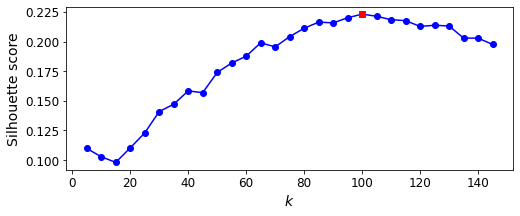

In [8]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train_pca, model.labels_)
                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

### 6. 문제 : 이너셔 그래프 (inertias)를 그려보고, 최적의 클러스터 개수를 구할 수 있는지 확인하세요. (엘보우 지점이 있는지 확인해보세요)

힌트: 코드의 각주를 풀고, 문제 5번의 시각화 코드를 조금만 수정해보세요

In [9]:
best_k

100

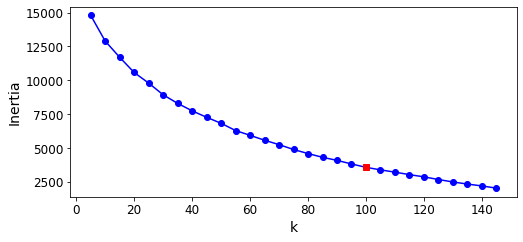

In [10]:
inertias=[model.inertia_ for model in kmeans_per_k]
best_inertia=inertias[best_index]

plt.figure(figsize=(8,3.5))
plt.plot(k_range,inertias,'bo-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.plot(best_k,best_inertia,'rs')
plt.show()

cluster 0


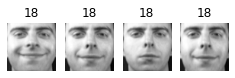

cluster 1


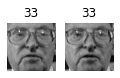

cluster 2


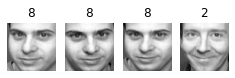

cluster 3


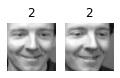

cluster 4


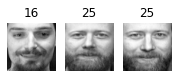

cluster 5


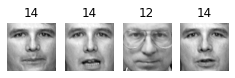

cluster 6


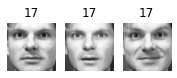

cluster 7


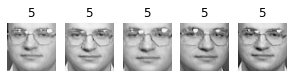

cluster 8


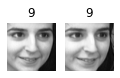

cluster 9


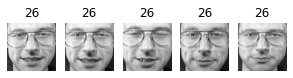

cluster 10


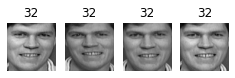

cluster 11


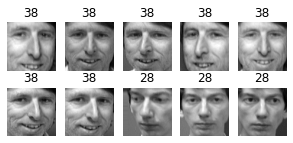

cluster 12


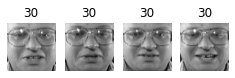

cluster 13


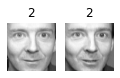

cluster 14


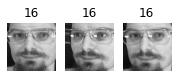

cluster 15


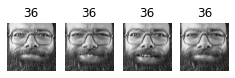

cluster 16


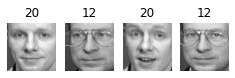

cluster 17


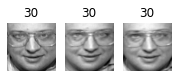

cluster 18


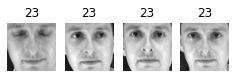

cluster 19


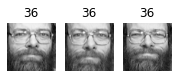

cluster 20


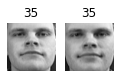

cluster 21


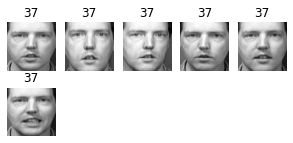

cluster 22


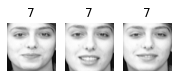

cluster 23


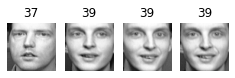

cluster 24


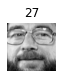

cluster 25


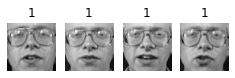

cluster 26


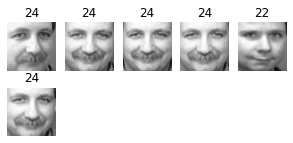

cluster 27


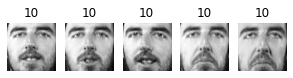

cluster 28


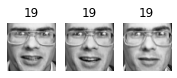

cluster 29


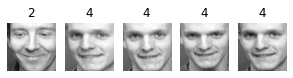

cluster 30


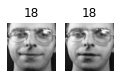

cluster 31


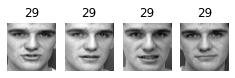

cluster 32


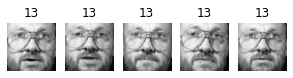

cluster 33


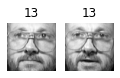

cluster 34


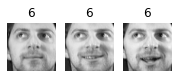

cluster 35


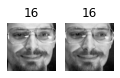

cluster 36


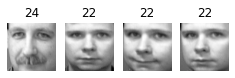

cluster 37


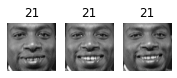

cluster 38


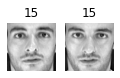

cluster 39


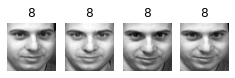

cluster 40


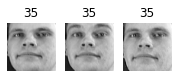

cluster 41


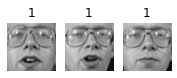

cluster 42


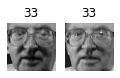

cluster 43


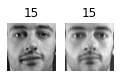

cluster 44


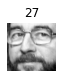

cluster 45


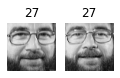

cluster 46


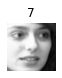

cluster 47


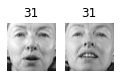

cluster 48


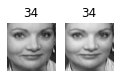

cluster 49


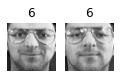

cluster 50


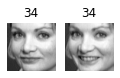

cluster 51


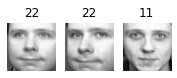

cluster 52


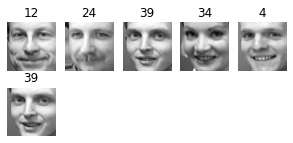

cluster 53


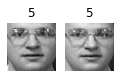

cluster 54


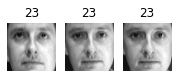

cluster 55


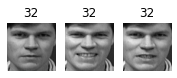

cluster 56


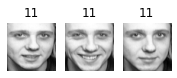

cluster 57


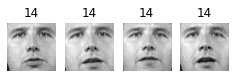

cluster 58


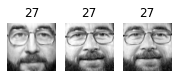

cluster 59


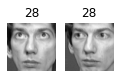

cluster 60


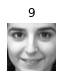

cluster 61


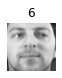

cluster 62


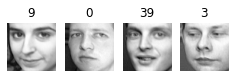

cluster 63


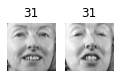

cluster 64


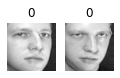

cluster 65


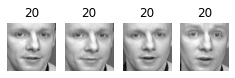

cluster 66


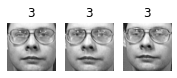

cluster 67


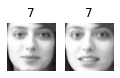

cluster 68


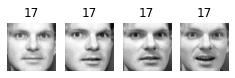

cluster 69


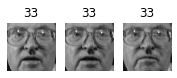

cluster 70


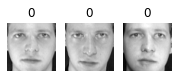

cluster 71


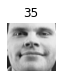

cluster 72


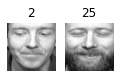

cluster 73


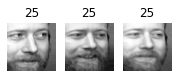

cluster 74


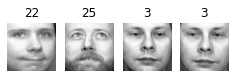

cluster 75


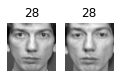

cluster 76


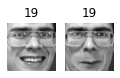

cluster 77


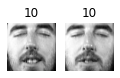

cluster 78


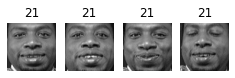

cluster 79


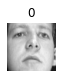

cluster 80


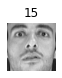

cluster 81


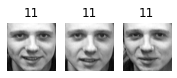

cluster 82


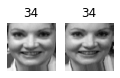

cluster 83


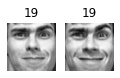

cluster 84


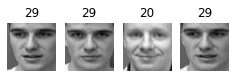

cluster 85


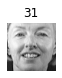

cluster 86


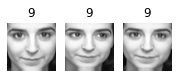

cluster 87


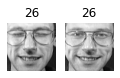

cluster 88


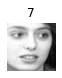

cluster 89


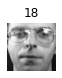

cluster 90


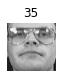

cluster 91


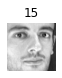

cluster 92


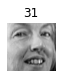

cluster 93


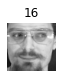

cluster 94


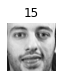

cluster 95


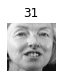

cluster 96


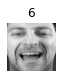

cluster 97


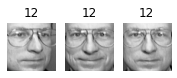

cluster 98


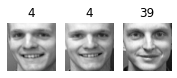

cluster 99


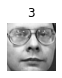

In [11]:
best_model=kmeans_per_k[best_index]

def plot_faces(faces,labels,n_cols=5):
  faces=faces.reshape(-1,64,64)
  n_rows=(len(faces)-1) // n_cols+1
  plt.figure(figsize=(n_cols,n_rows * 1.1))
  for index,(face,label) in enumerate(zip(faces,labels)):
    plt.subplot(n_rows,n_cols,index + 1)
    plt.imshow(face,cmap='gray')
    plt.axis('off')
    plt.title(label)
  plt.show()

for cluster_id in np.unique(best_model.labels_):
  print('cluster',cluster_id)
  in_cluster=best_model.labels_ == cluster_id
  faces=X_train[in_cluster]
  labels=y_train[in_cluster]
  plot_faces(faces,labels)